## Algorytm Genetyczny

Jest to schemat szukania optimum zainspirowany doborem naturalnym i ewolucją, zaliczamy go do kategorii algorytmów ewolucyjnych. Jego ideą jest wyszukiwanie optimum przeszukując przestrzeń rozwiązań, niekoniecznie przy tym przechodząc przez wszystkie jej elementy. Można go wykorzystać do np.: szukania maksimum funkcji, wyszukiwania najbardziej optymalnej ścieżki i chociażby rozwiązania sudoku.

In [1]:
from Genetic import *
plt.style.use('seaborn')

## Przykładowe funkcje:

In [2]:
def f1(x):
    return 5*(3*x-np.floor(3*x))
    
def f2(x):
    return np.sin(x * 50) * np.cos(x*30) * np.exp(x)
 
def f3(x):
    return np.sin(x * 50) * np.cos(x*30) * np.exp(x/30)

def f4(x):
    return (3* (np.sin(x) + np.sin(x * 2) / 2  + np.sin(x * 3) / 3 + np.sin(x * 4) / 4) + x) * np.exp(-x/50)

def f5(X):
    return f3(X) + f4(1 / (1 + X) )

def f6(X):
    return np.sin(np.sin(X) * (X*X + X)) * np.sin(X) * (X*X + np.sqrt(X)) 
        
def f7(X):
    return np.sin(np.arctan(X) * 50) * np.cos(np.arctan(X)*30) * np.exp(np.arctan(X)/30)

def f8(X):
    return np.sin(np.log(X*X)) * np.cos(1 - np.cos(np.exp(X)))

def f9(x):
    return x*x*np.sin(x*x)

def f10(x):
    return -np.sin(1-1/x/x)*np.exp(1-1/x/x)

functions = [f1, f2, f3, f4, f5, f6, f7, f8]

## 1. Stworzenie instancji algorytymu
Stworzenie instancji klasy GeneticAlgorithm z określonymi parametrami
<ul>
        <li>N - liczba osobników (koniecznie parzysta liczba)</li>
        <li> precision - długość osobnika, przy czym ilość punktów będzie równa 2^precision</li>
        <li> ranges - krotka postaci (a,b), gdzie a to lewa strona, a b prawa strona przedziału</li>
        <li> f - funkcja jednej zmiennej zdefiniowana przez użytkownika (najlepiej przy użyciu pakietu numPy)</li>
        <li>max_epochs - maksymalna liczba epok</li>
        <li>p_c - maksymalne prawdopodobieństwo krzyżowania</li>
        <li>p_m - maksymalne prawdopodobieństwo mutacji</li>
</ul>

In [8]:
N = 10
f = lambda X: np.abs(f3(X))
ranges = (-50, 50)
precision = 10
max_epochs = 3
GA = GeneticAlgorithm(N=N, f=f, ranges=ranges, precision=precision)


## 2. Stworzenie populacji
Stworzenie populacji początkowej - losowi osobnicy o losowych cechach. Każdy będzie miał swoją reprezentację binarną jako odzwierciedlenie liczby przypisanej naszej wartości.

In [10]:
population = GA.create_population()
print(population)
GA.X[population]

[ 974  929  932  738  300  434  389  746 1006  817]


array([ 45.21016618,  40.8113392 ,  41.10459433,  22.14076246,
       -20.6744868 ,  -7.57575758, -11.97458456,  22.92277615,
        48.33822092,  29.86314761])

## 3. Ewaluacja populacji
Oceniamy populację względem funkcji celu.

In [11]:
f_population = GA.evaluate_population(population)
print(f_population)

[2.90848542 2.46749355 0.14495262 0.43260316 0.01600677 0.35813442
 0.29673454 1.05028571 1.27286311 1.81869447]


## 4. Stworzenie zasięgów do ruletki
Na podstawie wyników tworzymy ruletkę - zasięgi ruletki to wartość poszczególnych osobników dzielona przez sumę wszystkich wartości.

[ 26.76556969  49.49508872  50.968223    55.07399575  55.36699046
  58.7912096   61.6534841   71.41241787  83.20842703 100.        ]


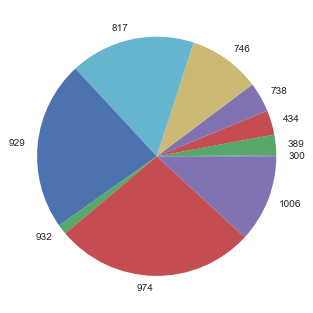

In [12]:
ranges = GA.create_ranges(f_population)
print(ranges)
GA.plot_ranges(population)
binary_population = GA.int_to_binary(population)

## 5. Wybranie rodziców
Wylosowanie liczb z zakresu (0,100) i okreslenie, w którym przedziale ruletki one leżą - tych osobników będziemy krzyżować.

In [14]:
parents = GA.choose_parents(ranges, binary_population)
int_parents = GA.binary_to_int(parents)
for i in range(len(parents)):
    print("{}:{}".format(int_parents[i],parents[i]))

285:[1 0 1 1 1 0 0 0 1 0]
463:[1 1 1 1 0 0 1 1 1 0]
349:[1 0 1 1 1 0 1 0 1 0]
463:[1 1 1 1 0 0 1 1 1 0]
463:[1 1 1 1 0 0 1 1 1 0]
535:[1 1 1 0 1 0 0 0 0 1]
463:[1 1 1 1 0 0 1 1 1 0]
535:[1 1 1 0 1 0 0 0 0 1]
479:[1 1 1 1 1 0 1 1 1 0]
463:[1 1 1 1 0 0 1 1 1 0]


## 6. Krzyżowanie z określonym prawdopodobieństwem
Określamy przedział prawdopodobieństwa, losujemy z niego liczbę i takie będzie prawdopodobieństwo, że krzyżowanie w ogóle zajdzie. Jeśli nie zajdzie, to potomkowie będą ideantyczni jak rodzice (co raczej nie ma miejsca w rzeczywistym świecie).

In [15]:
children = GA.crossover(parents, max_p=0.8)
int_children = GA.binary_to_int(children)
for i in range(len(children)):
    print("{}:{}".format(int_children[i],children[i]))

285:[1 0 1 1 1 0 0 0 1 0]
463:[1 1 1 1 0 0 1 1 1 0]
461:[1 0 1 1 0 0 1 1 1 0]
351:[1 1 1 1 1 0 1 0 1 0]
463:[1 1 1 1 0 0 1 1 1 0]
535:[1 1 1 0 1 0 0 0 0 1]
463:[1 1 1 1 0 0 1 1 1 0]
535:[1 1 1 0 1 0 0 0 0 1]
463:[1 1 1 1 0 0 1 1 1 0]
479:[1 1 1 1 1 0 1 1 1 0]


In [ ]:
"000011|111"  "000011 | 000"
"010011|000"  "010011 | 111"

## 7. Mutacja z określonym prawdopobieństwem
Znowu okreslamy przedział, z którego będziemy losować prawdopodobieństwo mutacji i ponownie - zajdzie ona lub nie zajdzie. Mutacją u nas jest zmiana jednego bitu w kodzie binarnym na przeciwny. W tym przypadku mutacja przesądza o cechach osobnika i jest to jedna z różnic między genetyką w jej przyrodniczym rozumieniu, a tym "naszym" algorytmicznym (gdyż w pierwszym przypadku geny nie przesądzają o wystąpieniu danej cechy, a bardziej ich ekspresja).

In [16]:
mutation = GA.mutation(children, max_p=0.5)
int_mutation = GA.binary_to_int(children)
for i in range(len(mutation)):
    print("{}:{}".format(int_mutation[i],mutation[i]))

285:[1 0 1 1 1 0 0 0 1 0]
463:[1 1 1 1 0 0 1 1 1 0]
461:[1 0 1 1 0 0 1 1 1 0]
347:[1 1 0 1 1 0 1 0 1 0]
207:[1 1 1 1 0 0 1 1 0 0]
535:[1 1 1 0 1 0 0 0 0 1]
463:[1 1 1 1 0 0 1 1 1 0]
535:[1 1 1 0 1 0 0 0 0 1]
335:[1 1 1 1 0 0 1 0 1 0]
479:[1 1 1 1 1 0 1 1 1 0]


In [ ]:
"01001|1|000" => "01001|0|000"

## 8. Wykorzystanie idei elityzmu do pozostawienia najlepszego osobnika
Dążymy do populacji jak najbliższej ideałowi, więc najlepszy osobnik będzie automatycznie przechodził do nowego pokolenia (nie żałujemy przecież słabszych). Natomiast konsekwencją w teorii powinno być ostateczne zwiększenie występowania (zmultiplikowanie) najlepszego osobnika.

In [17]:
new_population = int_mutation
new_population = GA.elitism(population, new_population)
print(new_population)

[974 463 461 347 207 535 463 974 335 479]


## 9. Ocena populacji
Oceniamy współczynnik zmienności populacji, czyli jaka część starych osobników przeszła do nowego pokolenia. Przy założeniu elityzmu, wartość powinna się zwiększać z każdym przebiegiem.

In [18]:
rate = GA.child_parent_changes(population, new_population)
rate

0.1

## 10. Zamiana populacji na nową
Populacja powstała po skrzyżowaniu i mutacjach wraz z osobnikiem najbliższym ideału 
(wchodzi za innego - losowego, słabszego osobnika) jest podmieniana za poprzednią populację i całość będzie wykonywać się w pętli - tak długo aż zajdzie warunek stopu (a mamy ich kilka). Po zakończeniu przebiegu całości populacja wynikowa powinna być tą najbardziej optymalną.

In [14]:
population = new_population
print(new_population)

[925 469 503 499 925 499 499 743 743 453]


## Warunki stopu:
1) Określona liczba epok, po której pętla kończy przebieg (sparametryzowana w funkcji przez wartość max_epochs)

2) Gdy po określonej części naszej docelowej liczby epok nasze znalezione dotychczas maksimum nie ulega zmianie 

3) Gdy po określonej części naszej docelowej liczby epok populacja dzieci zgadza się z populacją rodziców np. w 70%


## Bez elityzmu:

## Wywołanie z warunkiem stopu maksimum (1)

C:\Users\elrat\AppData\Local\Temp/ipykernel_21476/1975617276.py:17: RuntimeWarning: invalid value encountered in sqrt
  return np.sin(np.sin(X) * (X*X + X)) * np.sin(X) * (X*X + np.sqrt(X))


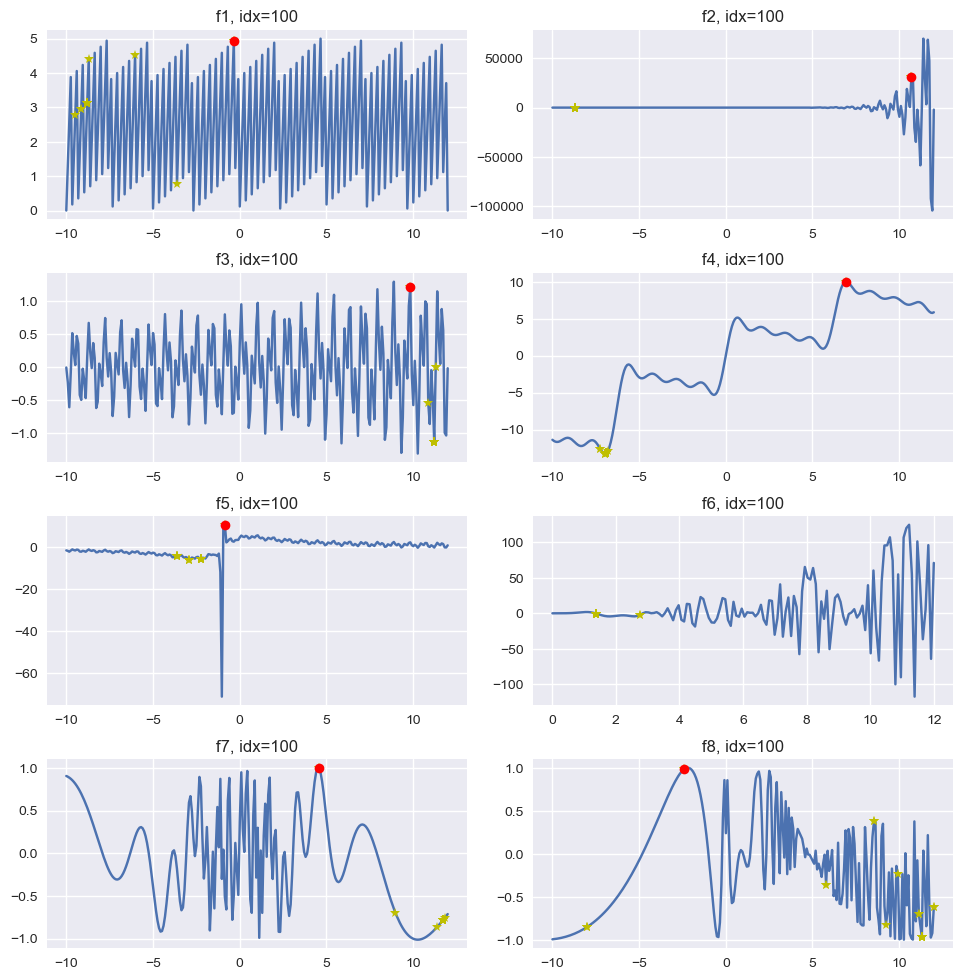

In [19]:
fig, ((ax1, ax2),(ax3, ax4), (ax5, ax6),(ax7, ax8)) = plt.subplots(4,2)
fig.set_size_inches(10, 10)
fig.dpi=100
fig.tight_layout(pad=2.0)

axes = [ax1, ax2, ax3, ax4, ax5, ax6,ax7, ax8]

for i in range(len(functions)):
    
    P, X, f_X, M, idx = run_GA_stop_condition_2(N=30, precision=8, ranges=(-10, 12), f = functions[i], max_epochs=100)
    plot_all(P, X, f_X, M, axes[i])
    axes[i].set_title('f{}, idx={}'.format(i+1, idx))

## Wywołanie z warunkiem stopu stabilizacji maksimum (2)

C:\Users\elrat\AppData\Local\Temp/ipykernel_21476/1975617276.py:17: RuntimeWarning: invalid value encountered in sqrt
  return np.sin(np.sin(X) * (X*X + X)) * np.sin(X) * (X*X + np.sqrt(X))


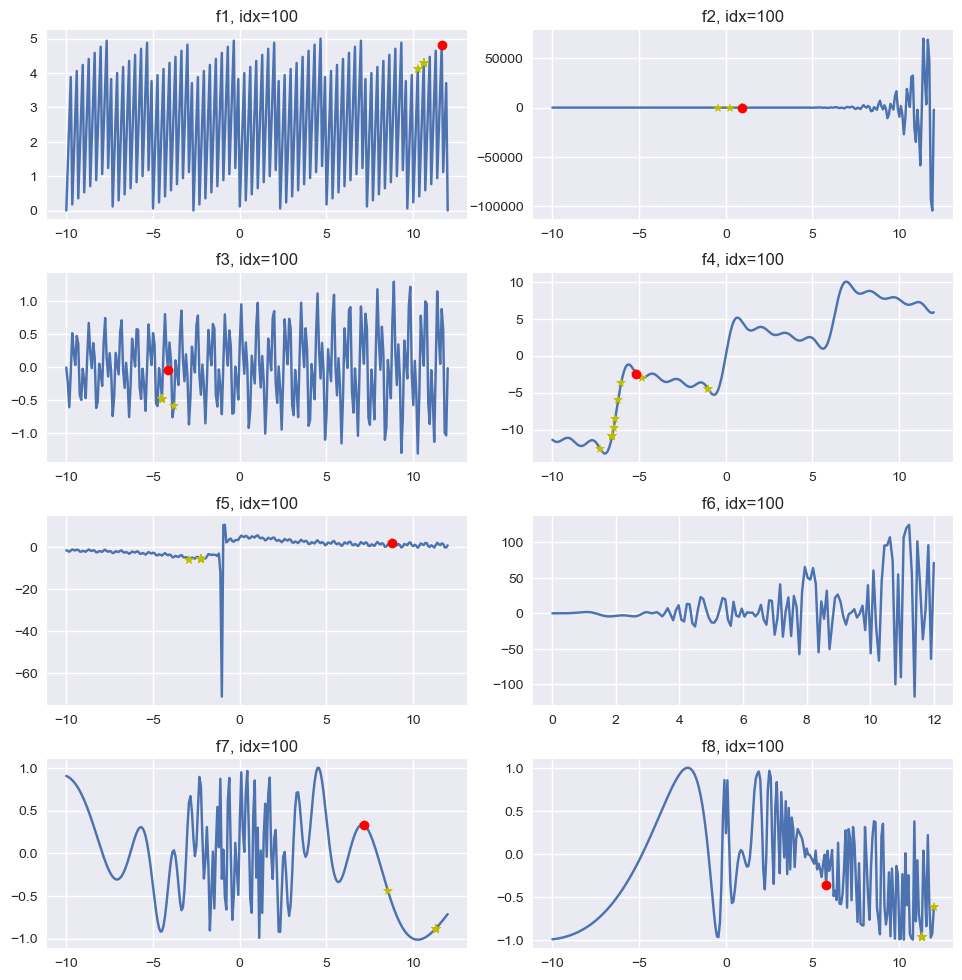

In [20]:
fig, ((ax1, ax2),(ax3, ax4), (ax5, ax6),(ax7, ax8)) = plt.subplots(4,2)
fig.set_size_inches(10, 10)
fig.dpi=100
fig.tight_layout(pad=2.0)

axes = [ax1, ax2, ax3, ax4, ax5, ax6,ax7, ax8]

for i in range(len(functions)):
    
    P, X, f_X, M, idx = run_GA_stop_condition_1(N=30, precision=8, ranges=(-10, 12), f = functions[i], max_epochs=100)
    plot_all(P, X, f_X, M, axes[i])
    axes[i].set_title('f{}, idx={}'.format(i+1, idx))

## Wywołanie z warunkiem stopu stabilizacji maksimum (3)

C:\Users\elrat\AppData\Local\Temp/ipykernel_21476/1975617276.py:17: RuntimeWarning: invalid value encountered in sqrt
  return np.sin(np.sin(X) * (X*X + X)) * np.sin(X) * (X*X + np.sqrt(X))


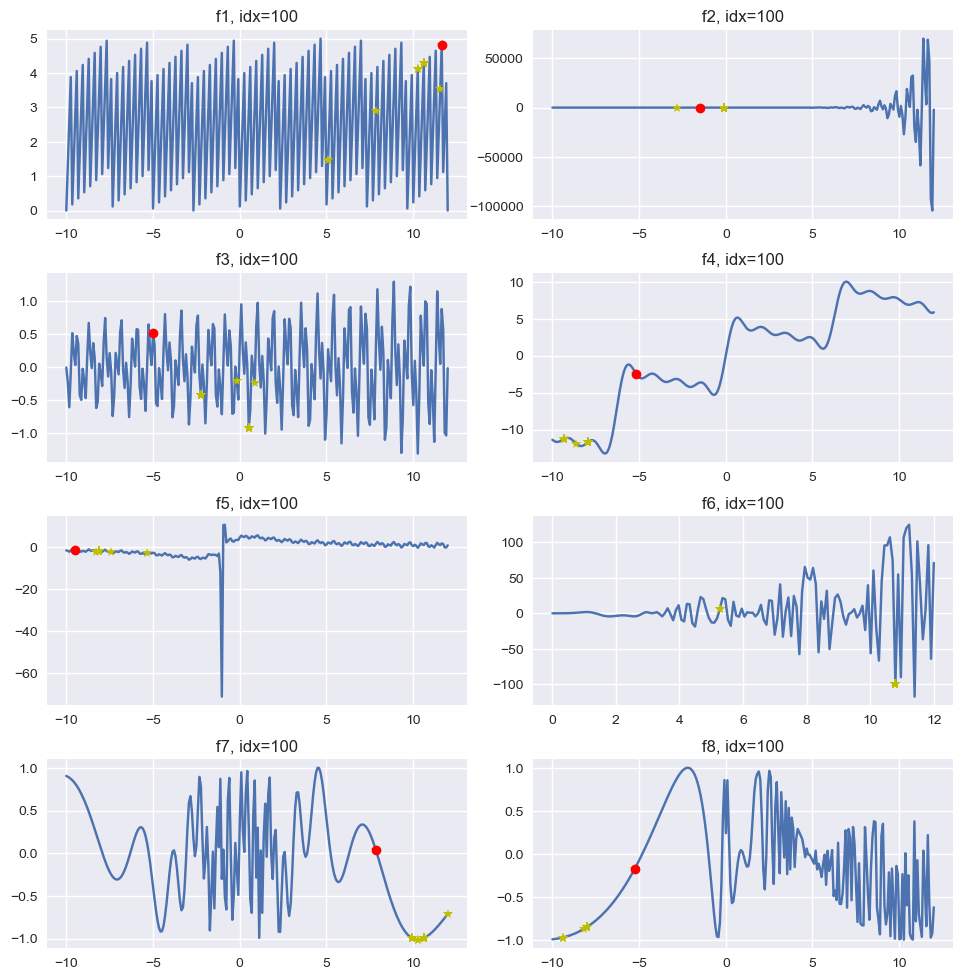

In [21]:
fig, ((ax1, ax2),(ax3, ax4), (ax5, ax6),(ax7, ax8)) = plt.subplots(4,2)
fig.set_size_inches(10, 10)
fig.dpi=100
fig.tight_layout(pad=2.0)

axes = [ax1, ax2, ax3, ax4, ax5, ax6,ax7, ax8]

for i in range(len(functions)):
    
    P, X, f_X, M, idx = run_GA_max_epochs(N=30, precision=8, ranges=(-10, 12), f = functions[i], max_epochs=100)
    plot_all(P, X, f_X, M, axes[i])
    axes[i].set_title('f{}, idx={}'.format(i+1, idx))

## Przykład ze zmieniami parametru $p_c$ (prawdopodobieństwo krzyżowania)

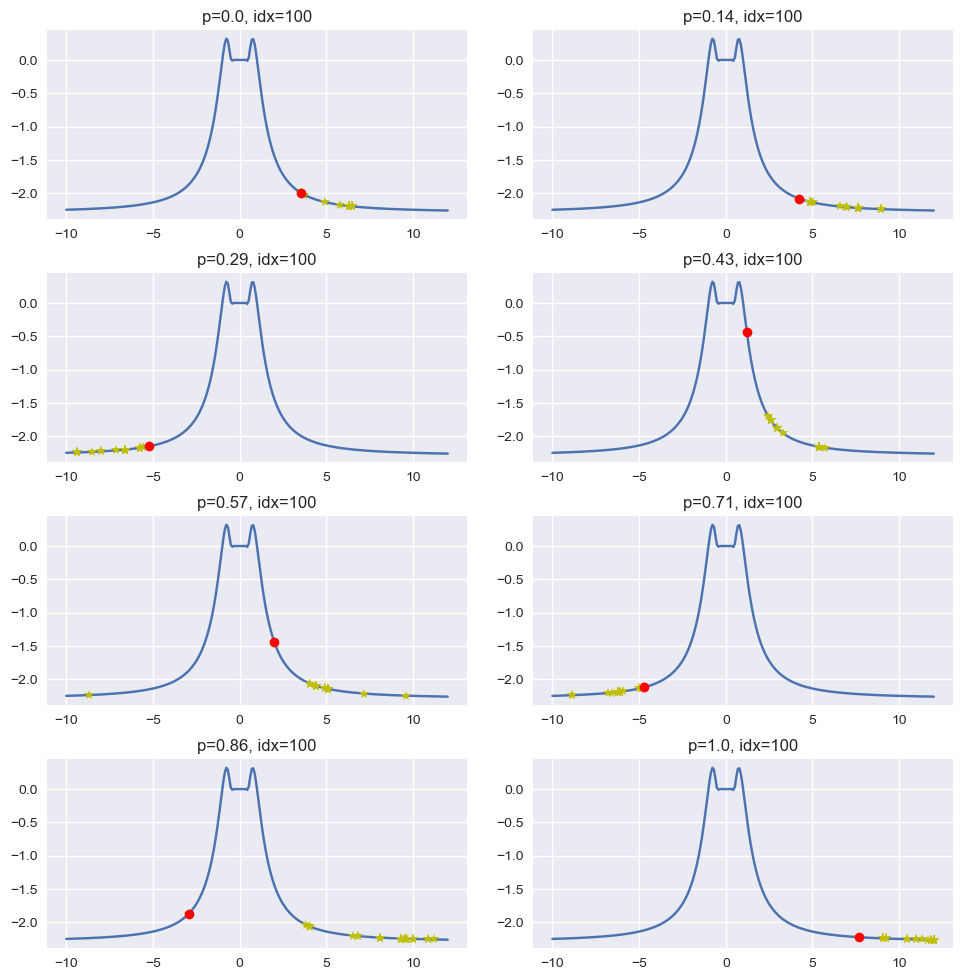

In [22]:
np.random.seed(1000)
fig, ((ax1, ax2),(ax3, ax4), (ax5, ax6),(ax7, ax8)) = plt.subplots(4,2)
fig.set_size_inches(10, 10)
fig.dpi=100
fig.tight_layout(pad=2.0)
axes = [ax1, ax2, ax3, ax4, ax5, ax6,ax7, ax8]

p_list = np.linspace(0, 1, 8)

for pair in zip(p_list, axes):
    p = pair[0]
    ax = pair[1]
    P, X, f_X, M, idx = run_GA_stop_condition_1(N=30, precision=8, ranges=(-10, 12), f=f10, max_epochs=100,p_c=p)
    plot_all(P, X, f_X, M, ax)
    ax.set_title('p={}, idx={}'.format(round(p,2), idx))

## Przykład ze zmieniami parametru $p_m$ (prawdopodobieństwo mutacji)

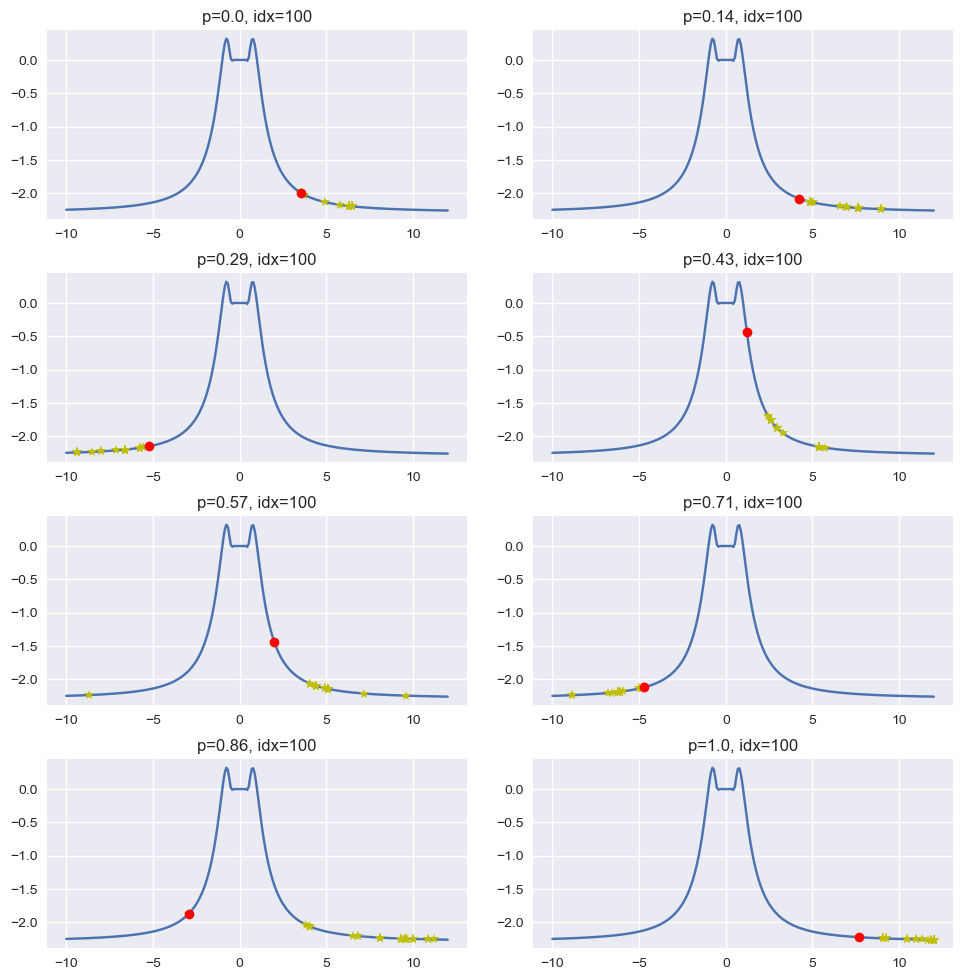

In [23]:
np.random.seed(1000)
fig, ((ax1, ax2),(ax3, ax4), (ax5, ax6),(ax7, ax8)) = plt.subplots(4,2)
fig.set_size_inches(10, 10)
fig.dpi=100
fig.tight_layout(pad=2.0)
axes = [ax1, ax2, ax3, ax4, ax5, ax6,ax7, ax8]

p_list = np.linspace(0, 1, 8)

for pair in zip(p_list, axes):
    p = pair[0]
    ax = pair[1]
    P, X, f_X, M, idx = run_GA_stop_condition_1(N=30, precision=8, ranges=(-10, 12), f=f10, max_epochs=100,p_m=p)
    plot_all(P, X, f_X, M, ax)
    ax.set_title('p={}, idx={}'.format(round(p,2), idx))

## Zmiana precyzji

C:\Users\elrat\AppData\Local\Temp/ipykernel_21476/1975617276.py:29: RuntimeWarning: divide by zero encountered in true_divide
  return -np.sin(1-1/x/x)*np.exp(1-1/x/x)
C:\Users\elrat\AppData\Local\Temp/ipykernel_21476/1975617276.py:29: RuntimeWarning: invalid value encountered in sin
  return -np.sin(1-1/x/x)*np.exp(1-1/x/x)
C:\Users\elrat\AppData\Local\Temp/ipykernel_21476/1975617276.py:29: RuntimeWarning: divide by zero encountered in true_divide
  return -np.sin(1-1/x/x)*np.exp(1-1/x/x)
C:\Users\elrat\AppData\Local\Temp/ipykernel_21476/1975617276.py:29: RuntimeWarning: invalid value encountered in sin
  return -np.sin(1-1/x/x)*np.exp(1-1/x/x)


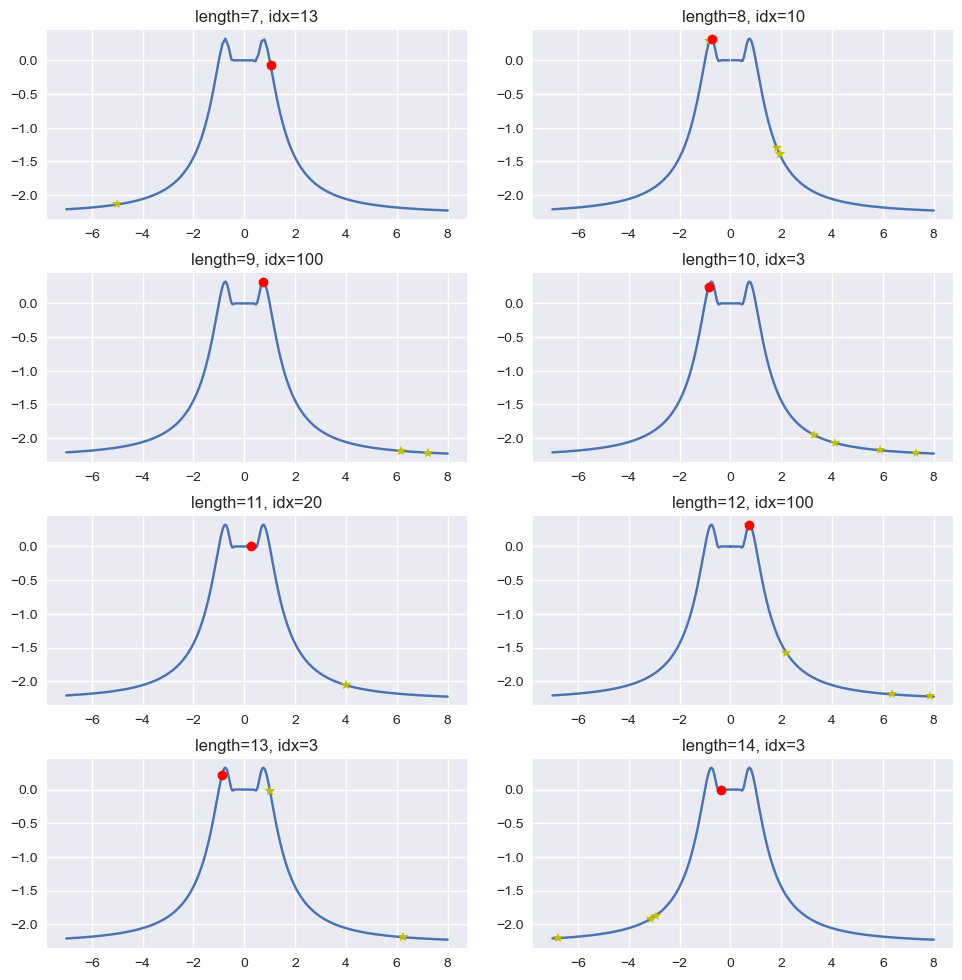

In [24]:
fig, ((ax1, ax2),(ax3, ax4), (ax5, ax6),(ax7, ax8)) = plt.subplots(4,2)
fig.set_size_inches(10, 10)
fig.dpi=100
fig.tight_layout(pad=2.0)
axes = [ax1, ax2, ax3, ax4, ax5, ax6,ax7, ax8]
prec = list(range(7, 15))

for pair in zip(prec, axes):
    p = pair[0]
    ax = pair[1]
    P, X, f_X, M, idx = run_GA_stop_condition_2(N=6, precision=p, ranges=(-7, 8), f=f10, max_epochs=100)
    plot_all(P, X, f_X, M, ax)
    ax.set_title('length={}, idx={}'.format(p, idx))

## Z elityzmem

## Wywołanie z warunkiem stopu maksimum (1)

C:\Users\elrat\AppData\Local\Temp/ipykernel_21476/1975617276.py:17: RuntimeWarning: invalid value encountered in sqrt
  return np.sin(np.sin(X) * (X*X + X)) * np.sin(X) * (X*X + np.sqrt(X))


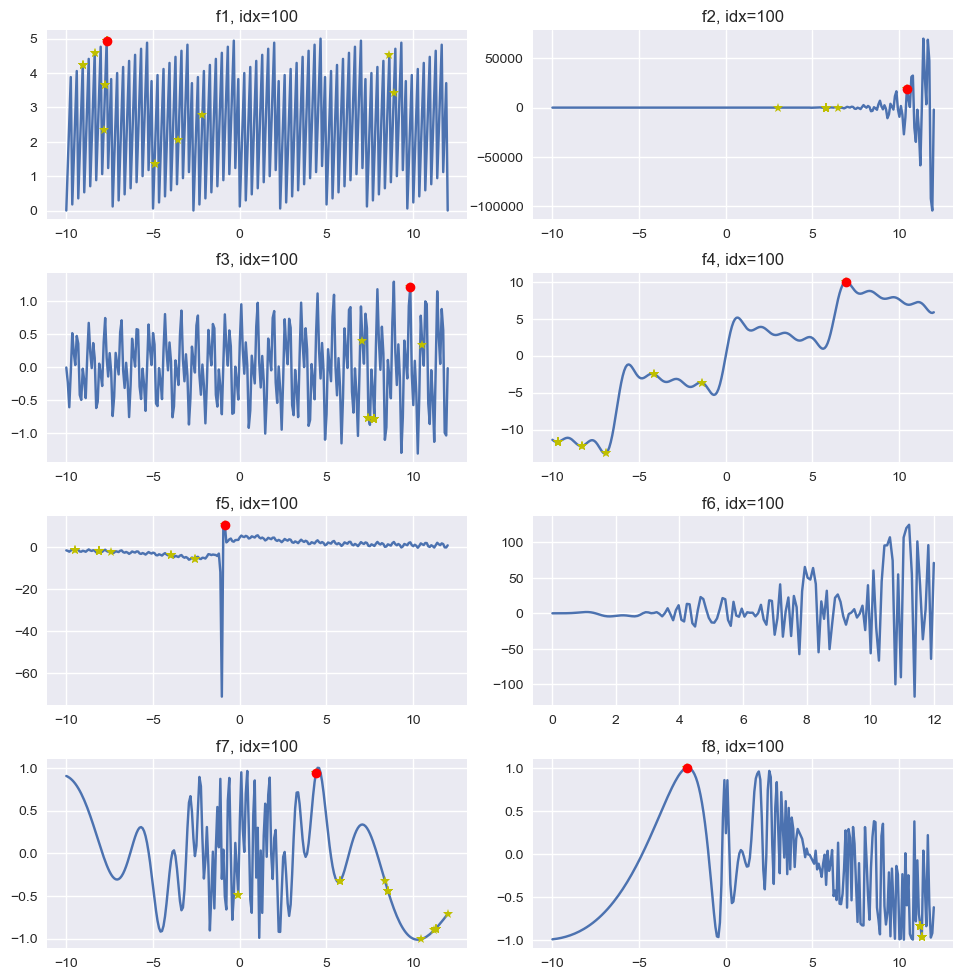

In [25]:
fig, ((ax1, ax2),(ax3, ax4), (ax5, ax6),(ax7, ax8)) = plt.subplots(4,2)
fig.set_size_inches(10, 10)
fig.dpi=100
fig.tight_layout(pad=2.0)

axes = [ax1, ax2, ax3, ax4, ax5, ax6,ax7, ax8]

for i in range(len(functions)):
    
    P, X, f_X, M, idx = run_GA_max_epochs_elitism(N=30, precision=8, ranges=(-10, 12), f = functions[i], max_epochs=100)
    plot_all(P, X, f_X, M, axes[i])
    axes[i].set_title('f{}, idx={}'.format(i+1, idx))
    

## Wywołanie z warunkiem stopu stabilizacji maksimum (2)

C:\Users\elrat\AppData\Local\Temp/ipykernel_21476/1975617276.py:17: RuntimeWarning: invalid value encountered in sqrt
  return np.sin(np.sin(X) * (X*X + X)) * np.sin(X) * (X*X + np.sqrt(X))


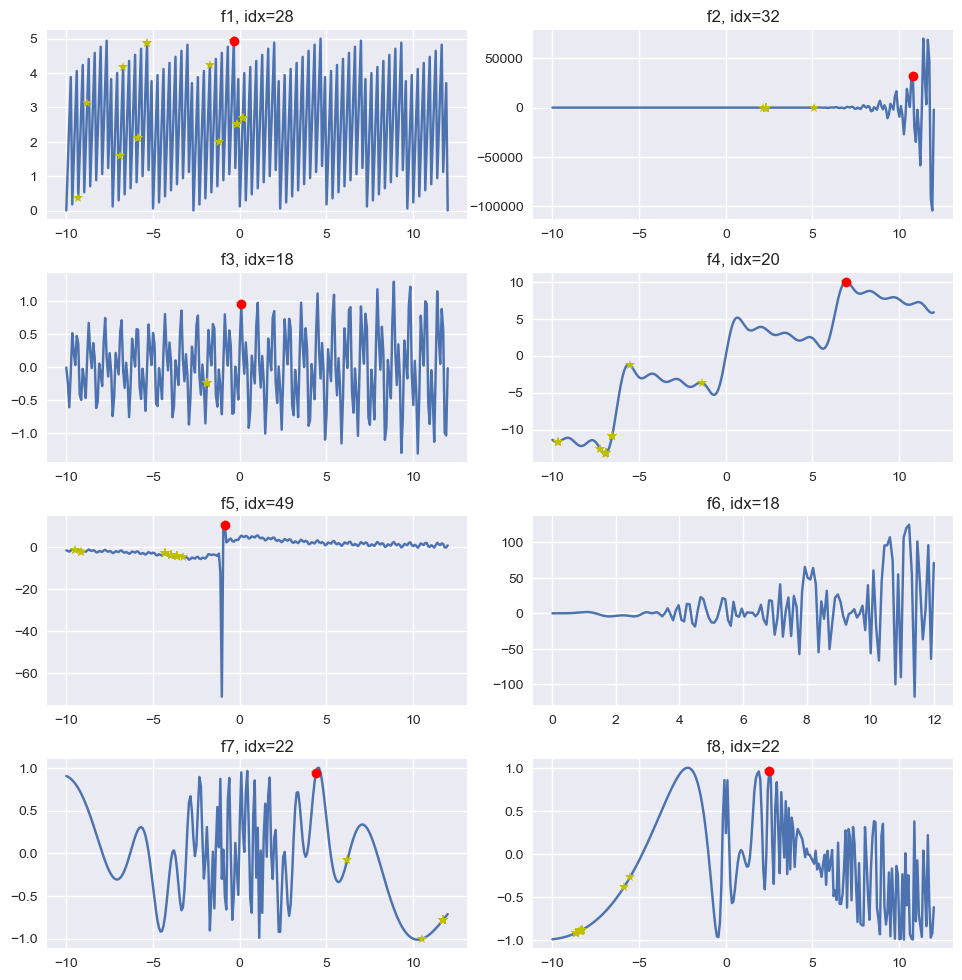

In [26]:
fig, ((ax1, ax2),(ax3, ax4), (ax5, ax6),(ax7, ax8)) = plt.subplots(4,2)
fig.set_size_inches(10, 10)
fig.dpi=100
fig.tight_layout(pad=2.0)

axes = [ax1, ax2, ax3, ax4, ax5, ax6,ax7, ax8]

for i in range(len(functions)):
    
    P, X, f_X, M, idx = run_GA_stop_condition_1_elitism(N=30, precision=8, ranges=(-10, 12), f = functions[i], max_epochs=100)
    plot_all(P, X, f_X, M, axes[i])
    axes[i].set_title('f{}, idx={}'.format(i+1, idx))

## Wywołanie z warunkiem stopu stabilizacji maksimum (3)

C:\Users\elrat\AppData\Local\Temp/ipykernel_21476/1975617276.py:17: RuntimeWarning: invalid value encountered in sqrt
  return np.sin(np.sin(X) * (X*X + X)) * np.sin(X) * (X*X + np.sqrt(X))


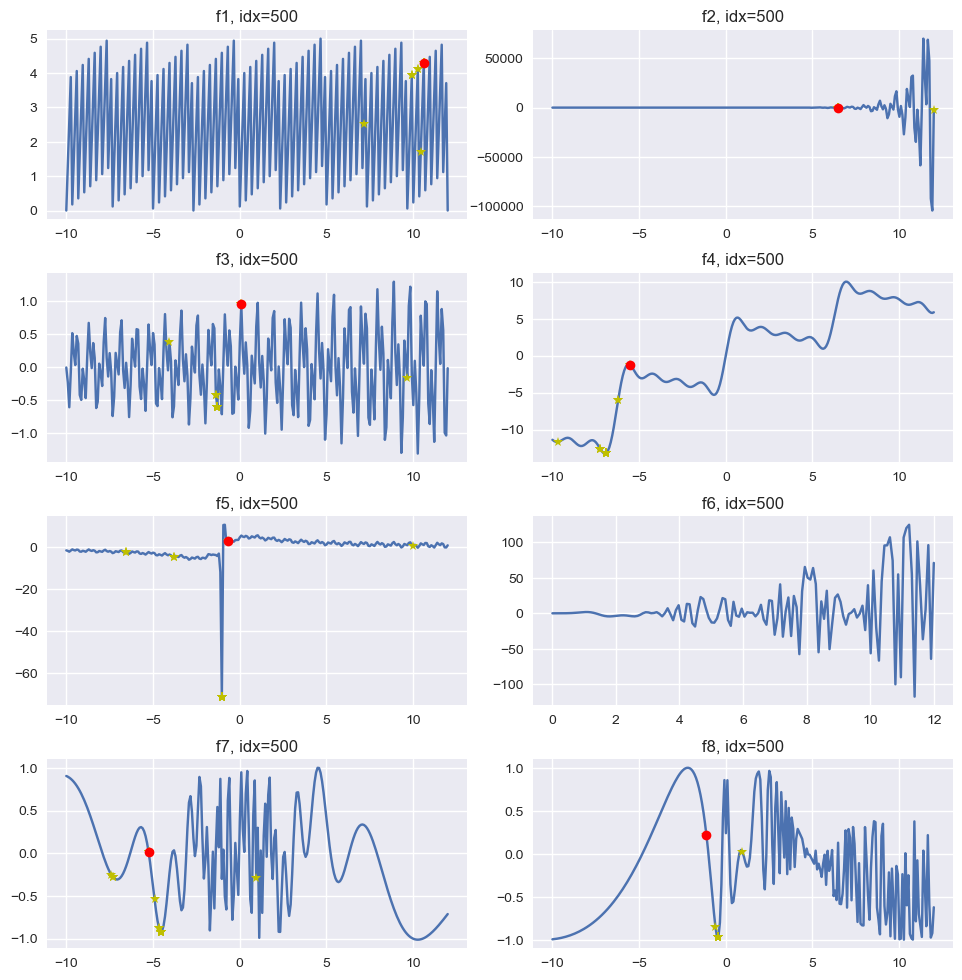

In [28]:
fig, ((ax1, ax2),(ax3, ax4), (ax5, ax6),(ax7, ax8)) = plt.subplots(4,2)
fig.set_size_inches(10, 10)
fig.dpi=100
fig.tight_layout(pad=2.0)

axes = [ax1, ax2, ax3, ax4, ax5, ax6,ax7, ax8]

for i in range(len(functions)):
    
    P, X, f_X, M, idx = run_GA_stop_condition_2_elitism(N=30, precision=8, ranges=(-10, 12), f = functions[i], max_epochs=500)
    plot_all(P, X, f_X, M, axes[i])
    axes[i].set_title('f{}, idx={}'.format(i+1, idx))

## Przykład ze zmieniami parametru $p_c$ (prawdopodobieństwo krzyżowania)

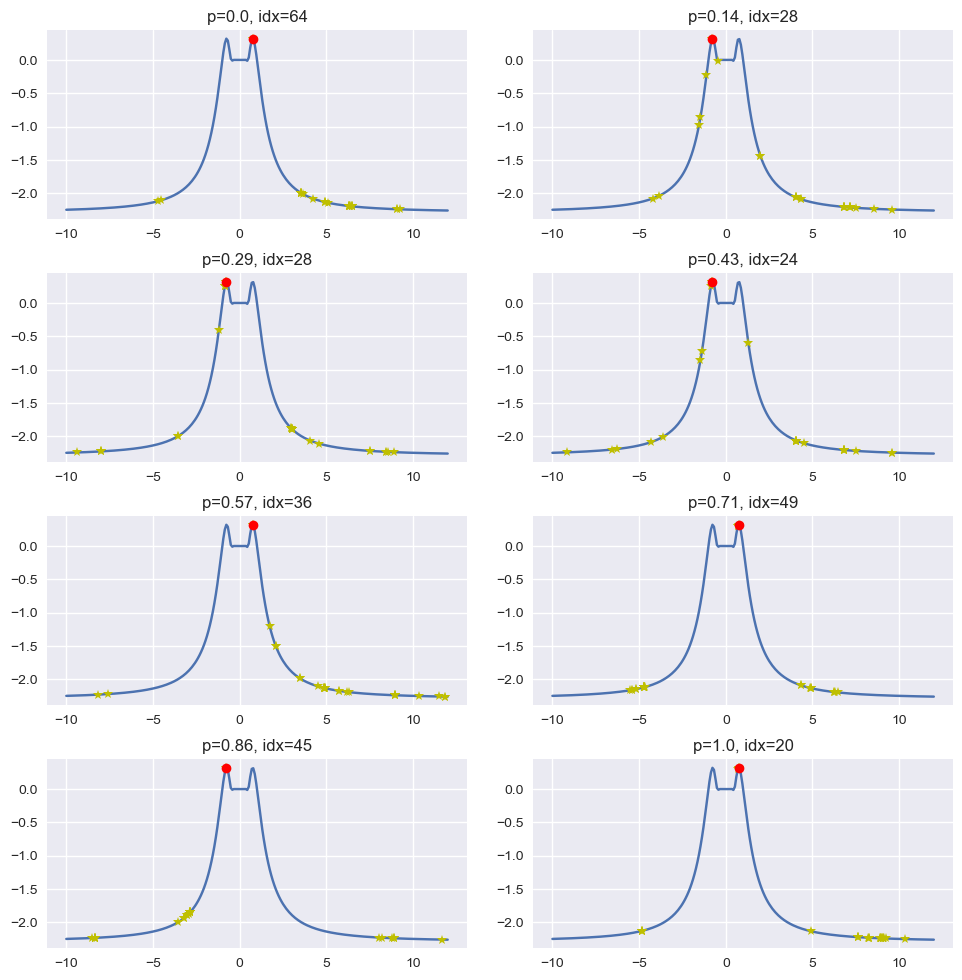

In [29]:
np.random.seed(1000)
fig, ((ax1, ax2),(ax3, ax4), (ax5, ax6),(ax7, ax8)) = plt.subplots(4,2)
fig.set_size_inches(10, 10)
fig.dpi=100
fig.tight_layout(pad=2.0)
axes = [ax1, ax2, ax3, ax4, ax5, ax6,ax7, ax8]

p_list = np.linspace(0, 1, 8)

for pair in zip(p_list, axes):
    p = pair[0]
    ax = pair[1]
    P, X, f_X, M, idx = run_GA_stop_condition_1_elitism(N=30, precision=8, ranges=(-10, 12), f=f10, max_epochs=100,p_c=p)
    plot_all(P, X, f_X, M, ax)
    ax.set_title('p={}, idx={}'.format(round(p,2), idx))

## Przykład ze zmieniami parametru $p_m$ (prawdopodobieństwo mutacji)

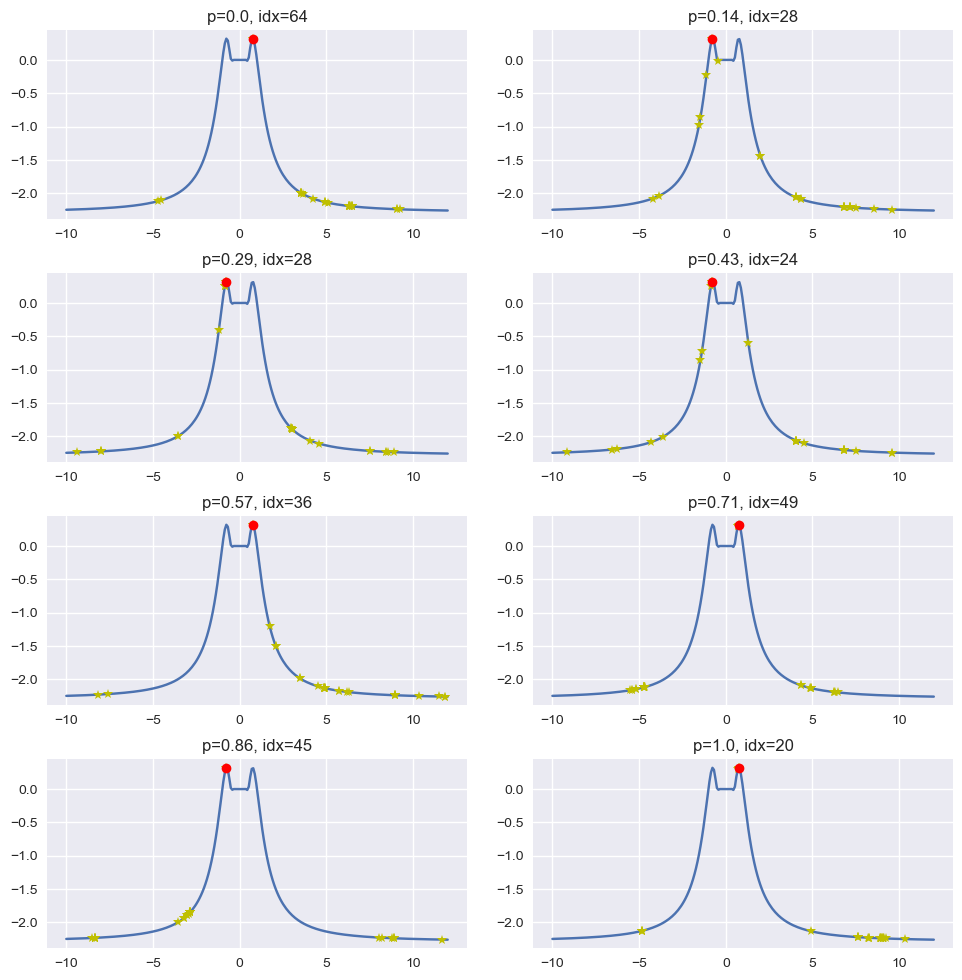

In [30]:
np.random.seed(1000)
fig, ((ax1, ax2),(ax3, ax4), (ax5, ax6),(ax7, ax8)) = plt.subplots(4,2)
fig.set_size_inches(10, 10)
fig.dpi=100
fig.tight_layout(pad=2.0)
axes = [ax1, ax2, ax3, ax4, ax5, ax6,ax7, ax8]

p_list = np.linspace(0, 1, 8)

for pair in zip(p_list, axes):
    p = pair[0]
    ax = pair[1]
    P, X, f_X, M, idx = run_GA_stop_condition_1_elitism(N=30, precision=8, ranges=(-10, 12), f=f10, max_epochs=100,p_m=p)
    plot_all(P, X, f_X, M, ax)
    ax.set_title('p={}, idx={}'.format(round(p,2), idx))

## Zmiana precyzji

C:\Users\elrat\AppData\Local\Temp/ipykernel_21476/1975617276.py:29: RuntimeWarning: divide by zero encountered in true_divide
  return -np.sin(1-1/x/x)*np.exp(1-1/x/x)
C:\Users\elrat\AppData\Local\Temp/ipykernel_21476/1975617276.py:29: RuntimeWarning: invalid value encountered in sin
  return -np.sin(1-1/x/x)*np.exp(1-1/x/x)
C:\Users\elrat\AppData\Local\Temp/ipykernel_21476/1975617276.py:29: RuntimeWarning: divide by zero encountered in true_divide
  return -np.sin(1-1/x/x)*np.exp(1-1/x/x)
C:\Users\elrat\AppData\Local\Temp/ipykernel_21476/1975617276.py:29: RuntimeWarning: invalid value encountered in sin
  return -np.sin(1-1/x/x)*np.exp(1-1/x/x)


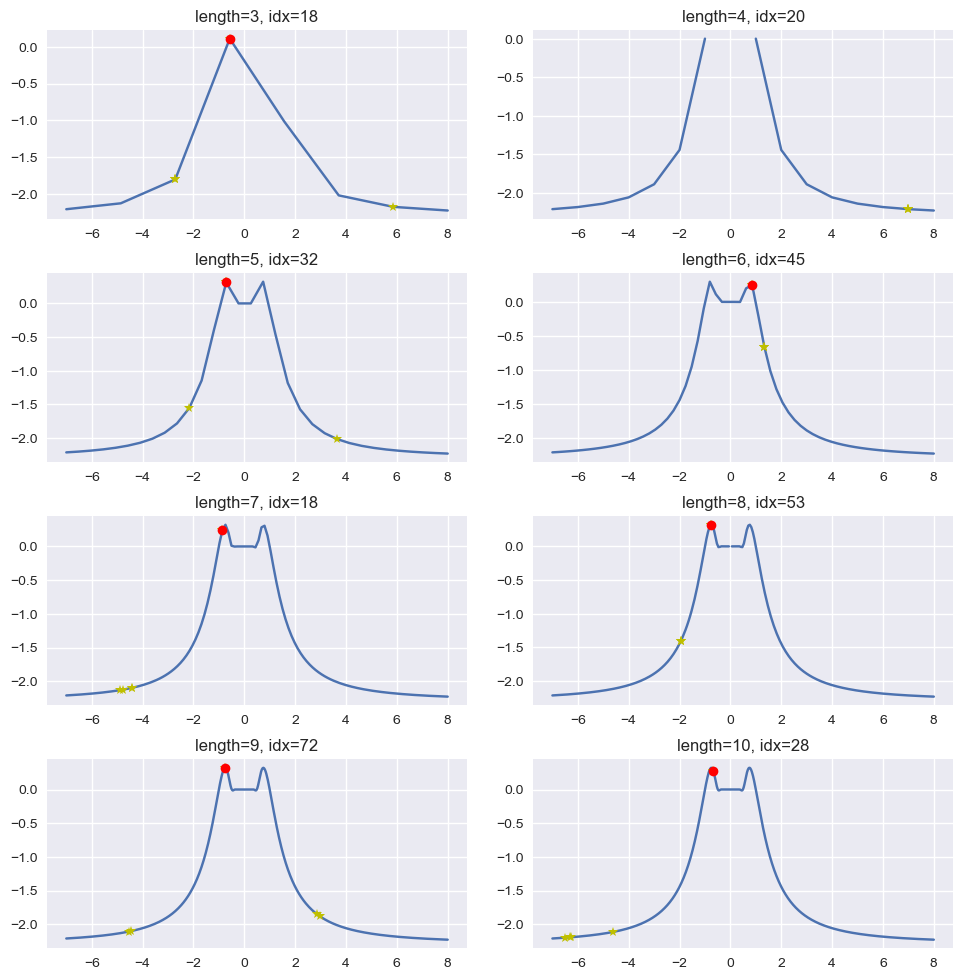

In [34]:
fig, ((ax1, ax2),(ax3, ax4), (ax5, ax6),(ax7, ax8)) = plt.subplots(4,2)
fig.set_size_inches(10, 10)
fig.dpi=100
fig.tight_layout(pad=2.0)
axes = [ax1, ax2, ax3, ax4, ax5, ax6,ax7, ax8]
prec = list(range(3, 11))

for pair in zip(prec, axes):
    p = pair[0]
    ax = pair[1]
    P, X, f_X, M, idx = run_GA_stop_condition_1_elitism(N=6, precision=p, ranges=(-7, 8), f=f10, max_epochs=100)
    plot_all(P, X, f_X, M, ax)
    ax.set_title('length={}, idx={}'.format(p, idx))